In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
bass = pd.read_csv('results/bass/bass-real-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', sep=r'[,;]+').rename(columns={'result': 'result_bass', 'model': 'model_bass'})
cvc5 = pd.read_csv('results/cvc5/cvc5-real-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', sep=r'[,:]+').rename(columns={'result': 'result_cvc5', 'model': 'model_cvc5'})
ostrich = pd.read_csv('results/ostrich/ostrich-real-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', sep=r'[,:]+').rename(columns={'result': 'result_ostrich', 'model': 'model_ostrich'})
z3 = pd.read_csv('results/z3-noodler/z3-noodler-real-logs.txt', header=None, names=['bench', 'result', 'model'], engine='python', sep=r'[,:]+').rename(columns={'result': 'result_z3', 'model': 'model_z3'})
reals = bass.merge(cvc5, how='outer', on='bench').merge(ostrich, how='outer', on='bench').merge(z3, how='outer', on='bench')
reals=reals.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # strip whitespace


/tmp/ipykernel_1655818/2964818801.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  reals=reals.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # strip whitespace


In [73]:
real_times = pd.read_csv('results/real-times.csv', header=1, index_col=False)
r_t = real_times.rename(columns={'filename': 'bench', 'real': 'bass_time', 'real.1': 'cvc5_time', 'real.2': 'ostrich_time', 'real.3': 'z3_time'})[['bench', 'bass_time', 'cvc5_time', 'ostrich_time', 'z3_time']]
r_t['bench'] = r_t['bench'].astype(str) + '.smt2'
r_t.fillna(120, inplace=True)  # fill missing times with timeout value
r_t['z3_time'] = 120

In [74]:
real = pd.merge(r_t, reals, how='outer', on='bench')

In [75]:
real['result_z3'] = 'timeout'

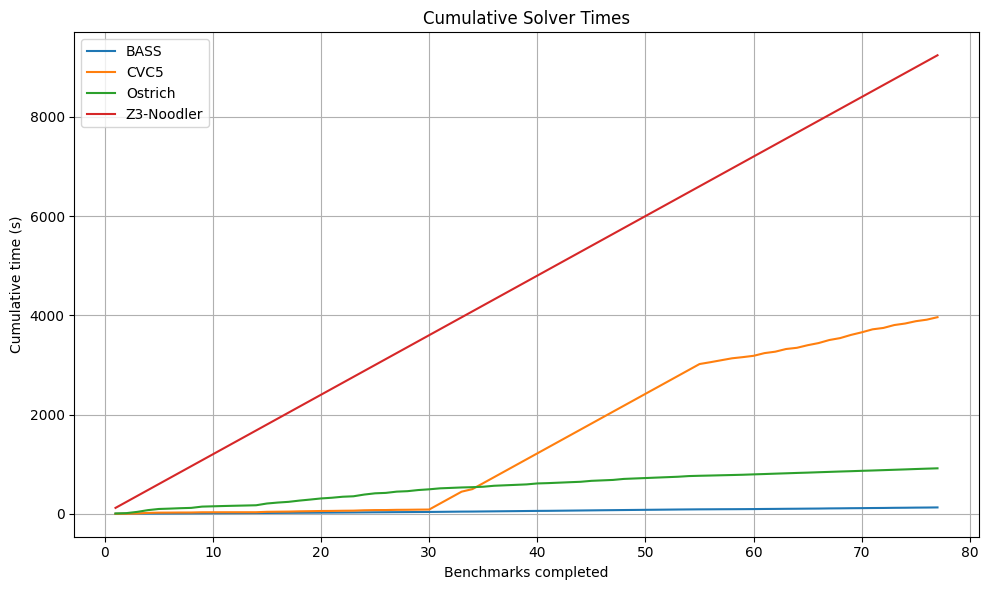

<Figure size 640x480 with 0 Axes>

In [76]:
cum_bass = r_t['bass_time'].cumsum()
cum_cvc5 = r_t['cvc5_time'].cumsum()
cum_ostrich = r_t['ostrich_time'].cumsum()
cum_z3 = r_t['z3_time'].cumsum()

# X-axis: number of benchmarks completed
x = range(1, len(r_t) + 1)

plt.figure(figsize=(10,6))
plt.plot(x, cum_bass, label='BASS')
plt.plot(x, cum_cvc5, label='CVC5')
plt.plot(x, cum_ostrich, label='Ostrich')
plt.plot(x, cum_z3, label='Z3-Noodler')
plt.xlabel('Benchmarks completed')
plt.ylabel('Cumulative time (s)')
plt.title('Cumulative Solver Times')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('plots/real-pyplot.png', dpi=300)

In [77]:
r_t.to_csv('results/real-times-cleaned.csv', index=False)

In [78]:
print("bass total time:", r_t['bass_time'].sum())
print("cvc5 total time:", r_t['cvc5_time'].sum())
print("ostrich total time:", r_t['ostrich_time'].sum())
print("z3 total time:", r_t['z3_time'].sum())

bass total time: 129.43
cvc5 total time: 3962.4899999999993
ostrich total time: 917.3199999999999
z3 total time: 9240


In [79]:
print(real['result_bass'].value_counts())
print(real['result_cvc5'].value_counts())
print(real['result_ostrich'].value_counts())
print(real['result_z3'].value_counts())

result_bass
sat    77
Name: count, dtype: int64
result_cvc5
sat                             53
cvc5 interrupted by SIGTERM.    24
Name: count, dtype: int64
result_ostrich
sat    77
Name: count, dtype: int64
result_z3
timeout    77
Name: count, dtype: int64


In [80]:
real.head()

,bench,bass_time,cvc5_time,ostrich_time,z3_time,result_bass,model_bass,result_cvc5,model_cvc5,result_ostrich,model_ostrich,result_z3,model_z3
0,beasties01.smt2,1.12,1.11,6.94,120,sat,"3: ""A"" 6: ""Q"" 9: ""G"" 12: ""G"" 15: ""G"" 18: ""G"" 2...",sat,"( (define-fun sym1669 () String ""G"") (define-f...",sat,"(model (define-fun L12 () String ""y"") (def...",timeout,"( (define-fun sym1244 () String ""A"") (..."
1,beasties02.smt2,1.22,1.07,7.25,120,sat,"3: ""H"" 6: ""H"" 9: ""H"" 12: ""H"" 15: ""H"" 18: ""G"" 2...",sat,"( (define-fun sym1679 () String ""H"") (define-f...",sat,"(model (define-fun L8 () String ""g"") (defi...",timeout,"( (define-fun sym1033 () String ""A"") (..."
2,beasties03.smt2,1.40,4.55,25.34,120,sat,"3: ""G"" 6: ""G"" 9: ""G"" 12: ""G"" 15: ""G"" 18: ""G"" 2...",sat,"( (define-fun sym205 () String ""Y"") (define-fu...",sat,"(model (define-fun L27 () String ""g"") (def...",timeout,"( (define-fun sym2525 () String ""A"") (..."
3,beasties04.smt2,1.72,12.42,35.41,120,sat,"3: ""K"" 6: ""K"" 9: ""K"" 12: ""K"" 15: ""K"" 18: ""K"" 2...",sat,"( (define-fun sym6582 () String ""K"") (define-f...",sat,"(model (define-fun L17 () String ""k"") (def...",timeout,"( (define-fun sym807 () String ""A"") (d..."
4,beasties05.smt2,1.37,5.08,23.10,120,sat,"3: ""R"" 6: ""R"" 9: ""R"" 12: ""K"" 15: ""K"" 18: ""K"" 2...",sat,"( (define-fun sym807 () String ""K"") (define-fu...",sat,"(model (define-fun L16 () String ""k"") (def...",timeout,"( (define-fun sym807 () String ""A"") (d..."


In [81]:
import re

def extract_quoted(text):
    return re.findall(r'"([^"]*)"', text)

real.fillna("", inplace=True)
real['model_bass'] = real['model_bass'].apply(extract_quoted)
real['model_cvc5'] = real['model_cvc5'].apply(extract_quoted)
real['model_ostrich'] = real['model_ostrich'].apply(extract_quoted)
real['model_z3'] = real['model_z3'].apply(extract_quoted)
real.head()

,bench,bass_time,cvc5_time,ostrich_time,z3_time,result_bass,model_bass,result_cvc5,model_cvc5,result_ostrich,model_ostrich,result_z3,model_z3
0,beasties01.smt2,1.12,1.11,6.94,120,sat,"[A, Q, G, G, G, G, G, G, Y, A]",sat,"[G, A, G, Q, G, G, Y, G, G, A]",sat,"[y, g, q, g, g, g, g, a, g, A, G, G, Y, G, G, ...",timeout,"[A, A, A, A, A, A, A, A, B, C, D, E, F, G, H, ..."
1,beasties02.smt2,1.22,1.07,7.25,120,sat,"[H, H, H, H, H, G, H, G, Y, A]",sat,"[H, H, H, H, H, G, Y, G, H, A]",sat,"[g, h, h, y, h, h, g, h, h, A, H, G, Y, G, H, ...",timeout,"[A, A, A, A, A, A, B, C, D, E, F, G, H, I, J, ..."
2,beasties03.smt2,1.40,4.55,25.34,120,sat,"[G, G, G, G, G, G, G, G, G, L, G, G, G, G, G, ...",sat,"[Y, G, G, G, G, G, A, G, G, H, G, L, G, G, G, ...",sat,"[g, g, g, g, l, g, g, g, y, g, g, g, l, g, g, ...",timeout,"[A, A, A, A, A, A, B, C, D, E, F, G, H, I, J, ..."
3,beasties04.smt2,1.72,12.42,35.41,120,sat,"[K, K, K, K, K, K, H, K, K, K, K, K, K, H, K, ...",sat,"[K, K, K, K, K, K, Y, K, H, K, K, K, K, K, K, ...",sat,"[k, k, k, k, k, h, k, k, k, r, k, k, r, k, h, ...",timeout,"[A, A, A, A, A, B, C, D, E, F, G, H, I, J, K, ..."
4,beasties05.smt2,1.37,5.08,23.10,120,sat,"[R, R, R, K, K, K, H, K, R, K, K, K, R, K, K, ...",sat,"[K, Y, K, H, H, K, R, K, K, K, K, K, R, K, K, ...",sat,"[k, r, k, k, k, y, r, k, k, r, k, k, k, h, k, ...",timeout,"[A, A, A, A, A, A, A, A, A, A, B, C, D, E, F, ..."


In [82]:
def compare_models(row):
    # Compare model_bass and model_cvc5 as an example
    m1 = [str(x).lower() for x in row['model_bass']]
    m2 = [str(x).lower() for x in row['model_cvc5']]
    return m1 == m2

real['models_agree'] = real.apply(compare_models, axis=1)

In [85]:
print("bass_mem: ",sum(real_times['mem']))
print("cvc5_mem: ",sum(real_times['mem.1']))
print("ostrich_mem: ",sum(real_times['mem.2']))
print("z3_mem: ",sum(real_times['mem.3']))

bass_mem:  12175700
cvc5_mem:  nan
ostrich_mem:  43803628
z3_mem:  nan
